In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [5]:
# Load the raw noisy data we generated 
data_path = Path('../data/raw/ecg_noisy_raw.csv')
df = pd.read_csv(data_path)
t = df['time'].values
signal = df['voltage'].values
sampling_rate = 1000

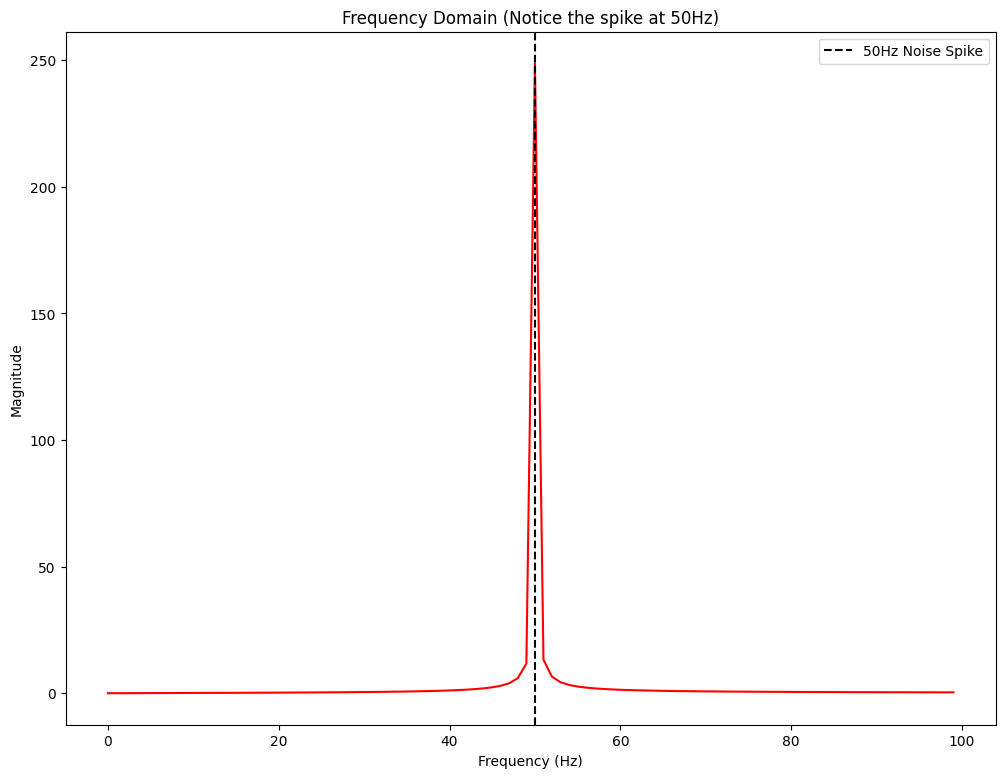

In [11]:
# Compute FFT
n = len(signal)
fft_spectrum = np.fft.rfft(signal)
freq = np.fft.rfftfreq(n, d=1/sampling_rate)

# Visualize the Frequency Domain (To see the 50Hz spike)
plt.figure(figsize = (12, 9))
plt.plot(
    freq[:100], 
    np.abs(fft_spectrum)[:100],
    color = 'red'
)
plt.axvline(
    50,
    color = 'black',
    linestyle = '--',
    label = '50Hz Noise Spike'
)
plt.title("Frequency Domain (Notice the spike at 50Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.savefig('../images/graph_raw_data.png', dpi = 300, bbox_inches = 'tight')
plt.show()

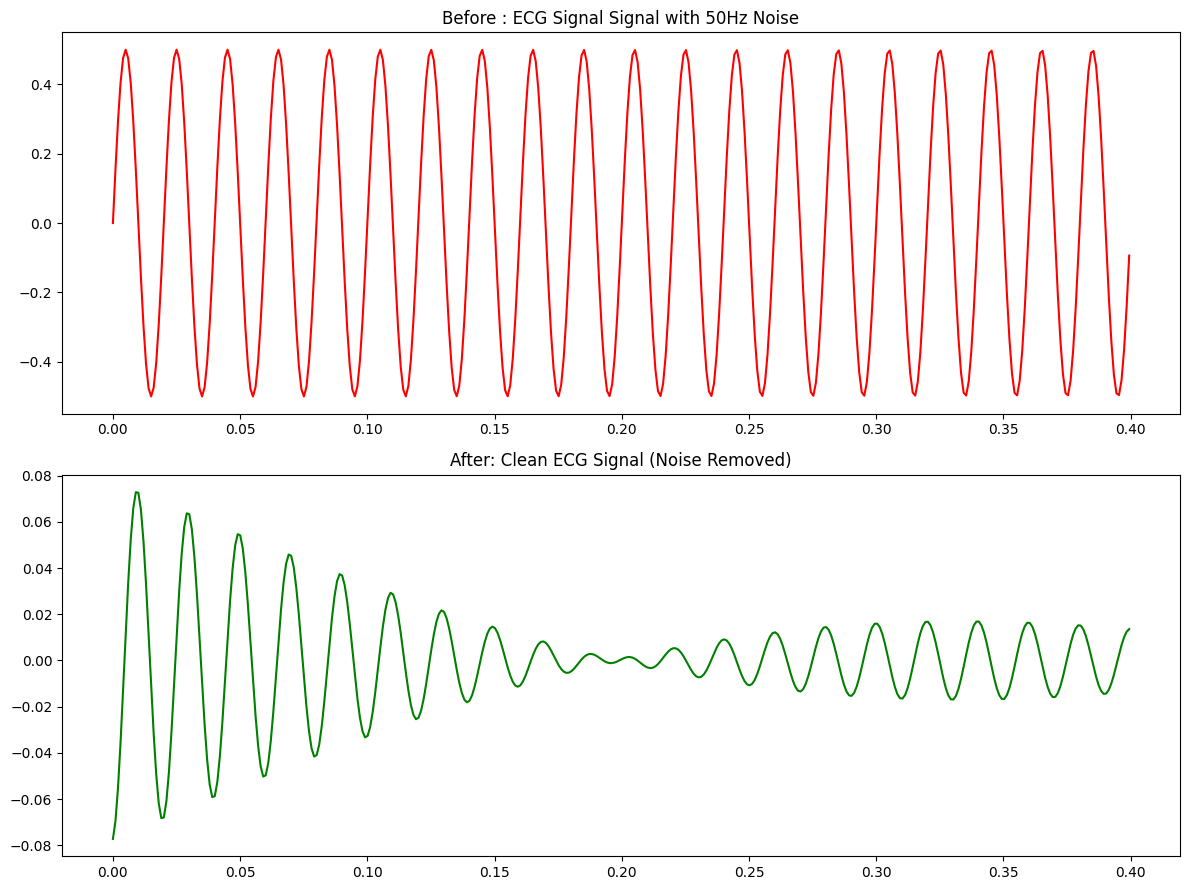

In [18]:
# Apply Filter: set 50Hz to zero
idx_50Hz = np.where(np.isclose(freq, 50, atol=1))[0]
fft_spectrum_filtered = fft_spectrum.copy()
fft_spectrum_filtered[idx_50Hz] = 0

# Reconstruct using IFFT 
clean_ecg = np.fft.irfft(fft_spectrum_filtered)

# Plot Comparison (Before vs After)
plt.figure(figsize = (12,9))
plt.subplot(2, 1 , 1)
plt.plot(
    t[:400],
    signal[:400],
    color = 'red',
    label = 'Noisy Signal (50Hz)'
)
plt.title("Before : ECG Signal Signal with 50Hz Noise")
plt.legend

plt.subplot(2, 1 , 2)
plt.plot(
    t[:400],
    clean_ecg[:400],
    color = 'green',
    label = 'Clean Signal (Filter)'
)
plt.title("After: Clean ECG Signal (Noise Removed)")
plt.tight_layout()
plt.savefig('../images/graph_clean_signal.png', dpi = 300, bbox_inches = 'tight')